In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import time
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
import random

In [2]:
bike_effort = pd.read_csv('Bike Effort Mileage Per Week.csv')

In [3]:
bike_effort

,user_id,9/28/2015,10/5/2015,10/12/2015,10/19/2015,10/26/2015,11/2/2015,11/9/2015,11/16/2015,11/23/2015
0,2461,NaN,1.43,1.50,1.51,NaN,1.49,1.55,1.54,1.54
1,2465,1.48,1.60,1.51,1.52,NaN,1.50,1.56,1.50,1.55
2,2439,1.45,1.50,1.51,1.54,1.53,1.53,1.52,1.55,NaN
3,2456,1.52,1.52,1.54,NaN,NaN,NaN,NaN,NaN,1.73
4,2508,NaN,1.42,1.43,1.48,1.42,1.47,1.42,1.23,1.46
5,828,1.61,1.40,1.57,1.56,1.62,1.44,1.56,1.75,2.02
6,2458,1.50,1.55,1.53,1.51,1.23,1.40,1.53,1.39,1.52
7,2468,1.68,1.60,1.53,1.57,1.58,1.50,1.56,1.54,1.33
8,2473,1.59,1.62,1.55,1.57,1.58,NaN,1.50,NaN,1.60
9,2466,1.21,1.51,1.48,1.46,1.53,1.51,1.51,1.50,1.61


In [4]:
#list of user_ids
users=[]
for i in range(0, len(bike_effort)):
    users.append(bike_effort['user_id'][i])
users

[2461, 2465, 2439, 2456, 2508, 828, 2458, 2468, 2473, 2466, 2469]

In [5]:
#create a dictionary where the key is the user_id, and the values are the bike efforts in order
n = bike_effort.shape[1]
bike_dict={}
for i in range(0, len(bike_effort)):
    bike_dict[users[i]]=bike_effort.values[i][1:n]

In [6]:
bike_dict

{828: array([ 1.61,  1.4 ,  1.57,  1.56,  1.62,  1.44,  1.56,  1.75,  2.02]),
 2439: array([ 1.45,  1.5 ,  1.51,  1.54,  1.53,  1.53,  1.52,  1.55,   nan]),
 2456: array([ 1.52,  1.52,  1.54,   nan,   nan,   nan,   nan,   nan,  1.73]),
 2458: array([ 1.5 ,  1.55,  1.53,  1.51,  1.23,  1.4 ,  1.53,  1.39,  1.52]),
 2461: array([  nan,  1.43,  1.5 ,  1.51,   nan,  1.49,  1.55,  1.54,  1.54]),
 2465: array([ 1.48,  1.6 ,  1.51,  1.52,   nan,  1.5 ,  1.56,  1.5 ,  1.55]),
 2466: array([ 1.21,  1.51,  1.48,  1.46,  1.53,  1.51,  1.51,  1.5 ,  1.61]),
 2468: array([ 1.68,  1.6 ,  1.53,  1.57,  1.58,  1.5 ,  1.56,  1.54,  1.33]),
 2469: array([ 1.5 ,  1.53,  1.5 ,  1.5 ,  1.5 ,  1.49,  1.51,  1.51,  1.53]),
 2473: array([ 1.59,  1.62,  1.55,  1.57,  1.58,   nan,  1.5 ,   nan,  1.6 ]),
 2508: array([  nan,  1.42,  1.43,  1.48,  1.42,  1.47,  1.42,  1.23,  1.46])}

In [7]:
np.isnan(bike_dict[2456][0])

False

In [8]:
tempbike_dict={}
for biker in bike_dict:
    new_list=[]
    for i in bike_dict[biker]:
        if np.isnan(i) == False:
            new_list.append(i)
    #biker is the user_id
    tempbike_dict[biker]=new_list

In [9]:
#mean performance:
user_means={}
for u in users:
    user_means[u]= np.mean(tempbike_dict[u])
user_means

{828: 1.6144444444444443,
 2439: 1.5162500000000001,
 2456: 1.5775000000000001,
 2458: 1.4622222222222223,
 2461: 1.5085714285714285,
 2465: 1.5274999999999999,
 2466: 1.48,
 2468: 1.5433333333333334,
 2469: 1.5077777777777777,
 2473: 1.5728571428571427,
 2508: 1.41625}

C:\Users\BUCKBEAK\Anaconda\lib\site-packages\matplotlib\figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


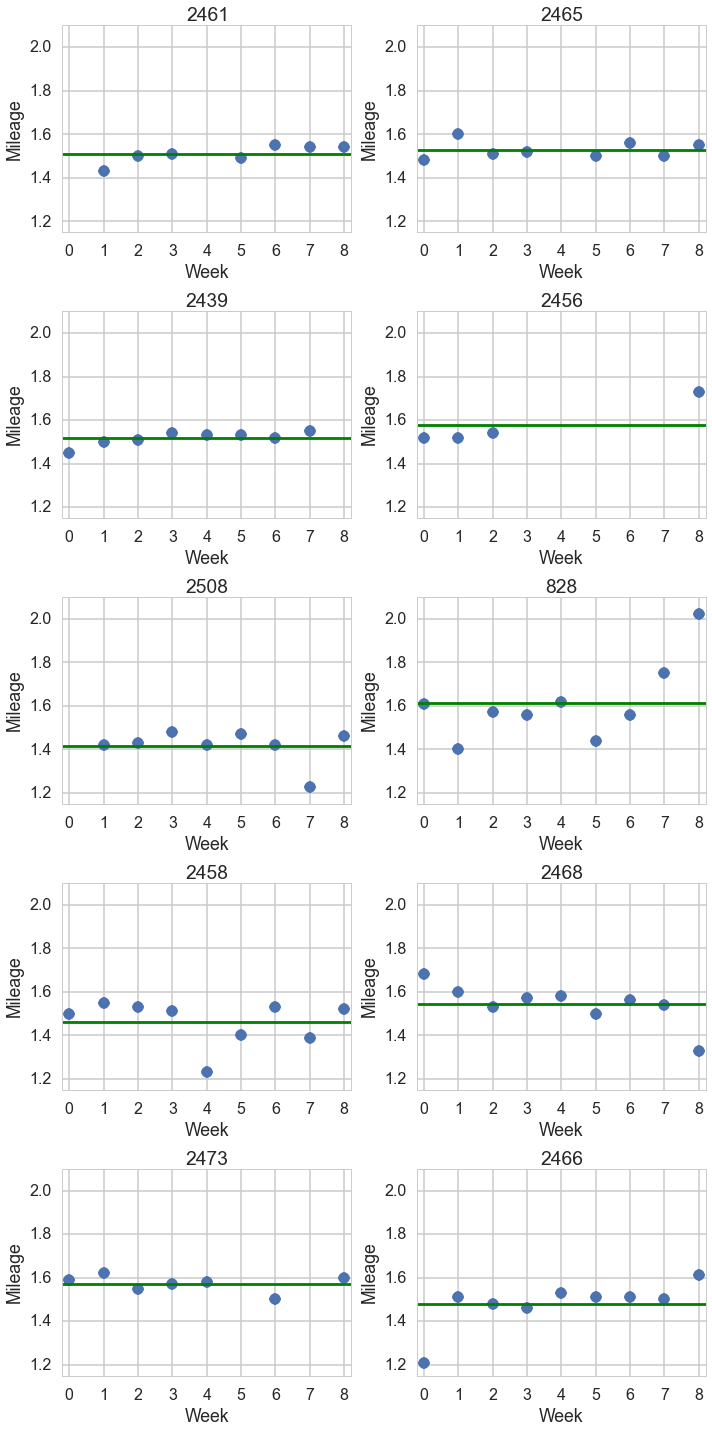

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20), tight_layout=True)
for ax, u in zip(axes.ravel(),users):
    ax.plot(bike_dict[u], 'o')
    ax.set_xlim(-.2, 8.2)
    ax.set_ylim(1.15, 2.1)
    ax.set_xlabel('Week')
    ax.set_ylabel('Mileage')
    ax.set_title(u)
    ax.axhline(user_means[u], color='green')

#Same Analysis as Race Times

#Simple OLS Regressions 

In [11]:
#These data contain weighted averages for ALL days before a race

df = pd.read_csv('final_bike_df.csv')
df2 = pd.read_csv('workout_final_bike_df.csv')
df.head(20)

,Unnamed: 0,user_id,bike_period,resting_heart_rate,hrv_rmssd,time_in_bed,latency,rem_sleep_duration,slow_wave_sleep_duration,light_sleep_duration,wake_duration,cycles_count,score,recovery_score,sleep_duration,user_2439,user_2456,user_2458,user_2465,user_2466,user_2468,user_2469,user_2473,user_2508,distance
0,0,828,1,45.840000,0.071358,32839321.5714,1602048.400000,4230571.42857,3967428.43810,20112571.4286,4433714.17143,6.110000,82.361905,65.180000,28310571.2952,0,0,0,0,0,0,0,0,0,1.61
1,1,828,2,46.321429,0.101769,34242557.5714,1394205.142860,5795357.14286,3725357.07143,21417857.1429,3306428.42857,7.321429,95.107143,78.642857,30938571.3571,0,0,0,0,0,0,0,0,0,1.40
2,2,828,3,45.600000,0.050283,33588485.8000,1143982.300000,5506000.00000,3923000.00000,20757000.0000,3390999.93333,7.033333,87.400000,50.366667,30186000.0000,0,0,0,0,0,0,0,0,0,1.57
3,3,828,4,47.714286,0.071248,35214528.2381,1634822.619050,1757142.85714,7674285.71429,18864285.7143,6920000.00000,3.809524,87.333333,62.285714,28295714.2857,0,0,0,0,0,0,0,0,0,1.56
4,4,828,5,45.384615,0.067056,35683863.9744,1392863.461540,1517692.30769,7470000.00000,20396153.8462,6299230.76923,3.358974,88.461538,53.692308,29383846.1538,0,0,0,0,0,0,0,0,0,1.62
5,5,828,6,46.000000,0.060430,35612000.0000,1122353.333330,2222000.00000,9090000.00000,18538000.0000,5776000.00000,4.466667,85.733333,51.533333,29850000.0000,0,0,0,0,0,0,0,0,0,1.44
6,6,828,7,44.771429,0.065066,35897440.7429,896221.514286,1579714.28571,7746000.00000,20193428.5714,6378000.00000,4.057143,94.514286,66.085714,29519142.8571,0,0,0,0,0,0,0,0,0,1.56
7,7,828,8,45.357143,0.074717,38029717.7143,1217814.321430,3429642.85714,8664642.85714,18999642.8571,6936428.57143,6.642857,93.678571,63.392857,31093928.5714,0,0,0,0,0,0,0,0,0,1.75
8,8,828,9,45.000000,0.079693,33960000.0000,990941.000000,2010000.00000,4440000.00000,22350000.0000,5040000.00000,3.000000,93.000000,62.000000,28800000.0000,0,0,0,0,0,0,0,0,0,2.02
9,9,2439,1,43.979798,0.145445,31539133.9596,1298529.121210,3969090.90909,3264848.48485,22241818.1313,2143939.39394,5.797980,85.939394,71.919192,29475757.5253,1,0,0,0,0,0,0,0,0,1.45


In [12]:
#merging the two dataframes
reg_df = pd.merge(df, df2, how='left')

In [13]:
#dropping the first column, which was just the index from when saving the dataframe to a csv earlier
reg_df = reg_df.drop(df.columns[0], axis=1)
reg_df.columns

Index([u'user_id', u'bike_period', u'resting_heart_rate', u'hrv_rmssd', u'time_in_bed', u'latency', u'rem_sleep_duration', u'slow_wave_sleep_duration', u'light_sleep_duration', u'wake_duration', u'cycles_count', u'score', u'recovery_score', u'sleep_duration', u'user_2439', u'user_2456', u'user_2458', u'user_2465', u'user_2466', u'user_2468', u'user_2469', u'user_2473', u'user_2508', u'distance', u'z1', u'z2', u'z3', u'z4', u'z5'], dtype='object')

In [14]:
reg_df.head(20)

,user_id,bike_period,resting_heart_rate,hrv_rmssd,time_in_bed,latency,rem_sleep_duration,slow_wave_sleep_duration,light_sleep_duration,wake_duration,cycles_count,score,recovery_score,sleep_duration,user_2439,user_2456,user_2458,user_2465,user_2466,user_2468,user_2469,user_2473,user_2508,distance,z1,z2,z3,z4,z5
0,828,1,45.840000,0.071358,32839321.5714,1602048.400000,4230571.42857,3967428.43810,20112571.4286,4433714.17143,6.110000,82.361905,65.180000,28310571.2952,0,0,0,0,0,0,0,0,0,1.61,552.714286,705.054945,804.956044,1670.934066,281.527473
1,828,2,46.321429,0.101769,34242557.5714,1394205.142860,5795357.14286,3725357.07143,21417857.1429,3306428.42857,7.321429,95.107143,78.642857,30938571.3571,0,0,0,0,0,0,0,0,0,1.40,718.142857,1331.619048,2212.047619,2385.952381,235.190476
2,828,3,45.600000,0.050283,33588485.8000,1143982.300000,5506000.00000,3923000.00000,20757000.0000,3390999.93333,7.033333,87.400000,50.366667,30186000.0000,0,0,0,0,0,0,0,0,0,1.57,412.321429,270.714286,674.607143,1390.142857,438.964286
3,828,4,47.714286,0.071248,35214528.2381,1634822.619050,1757142.85714,7674285.71429,18864285.7143,6920000.00000,3.809524,87.333333,62.285714,28295714.2857,0,0,0,0,0,0,0,0,0,1.56,944.733333,898.600000,784.466667,1819.200000,388.466667
4,828,5,45.384615,0.067056,35683863.9744,1392863.461540,1517692.30769,7470000.00000,20396153.8462,6299230.76923,3.358974,88.461538,53.692308,29383846.1538,0,0,0,0,0,0,0,0,0,1.62,641.055556,721.611111,580.444444,1651.055556,222.138889
5,828,6,46.000000,0.060430,35612000.0000,1122353.333330,2222000.00000,9090000.00000,18538000.0000,5776000.00000,4.466667,85.733333,51.533333,29850000.0000,0,0,0,0,0,0,0,0,0,1.44,976.500000,811.700000,748.900000,2692.000000,682.800000
6,828,7,44.771429,0.065066,35897440.7429,896221.514286,1579714.28571,7746000.00000,20193428.5714,6378000.00000,4.057143,94.514286,66.085714,29519142.8571,0,0,0,0,0,0,0,0,0,1.56,744.178571,628.214286,917.571429,2152.107143,200.607143
7,828,8,45.357143,0.074717,38029717.7143,1217814.321430,3429642.85714,8664642.85714,18999642.8571,6936428.57143,6.642857,93.678571,63.392857,31093928.5714,0,0,0,0,0,0,0,0,0,1.75,620.714286,742.047619,1019.190476,2360.619048,312.666667
8,828,9,45.000000,0.079693,33960000.0000,990941.000000,2010000.00000,4440000.00000,22350000.0000,5040000.00000,3.000000,93.000000,62.000000,28800000.0000,0,0,0,0,0,0,0,0,0,2.02,89.066667,84.200000,54.866667,121.933333,5.200000
9,2439,1,43.979798,0.145445,31539133.9596,1298529.121210,3969090.90909,3264848.48485,22241818.1313,2143939.39394,5.797980,85.939394,71.919192,29475757.5253,1,0,0,0,0,0,0,0,0,1.45,441.714286,824.560440,753.604396,1083.406593,4.120879


In [15]:
result1 = sm.ols(formula="distance~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result2 = sm.ols(formula="distance~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result3 = sm.ols(formula="distance~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result4 = sm.ols(formula="distance~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result5 = sm.ols(formula="distance~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result6 = sm.ols(formula="distance~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result7 = sm.ols(formula="distance~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result8 = sm.ols(formula="distance~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result9 = sm.ols(formula="distance~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result10 = sm.ols(formula="distance~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result11 = sm.ols(formula="distance~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result12 = sm.ols(formula="distance~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result13 = sm.ols(formula="distance~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result14 = sm.ols(formula="distance~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result15 = sm.ols(formula="distance~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result16 = sm.ols(formula="distance~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result17 = sm.ols(formula="distance~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()

Here we regress one variable at a time, and also include the dummy variables for the racer.

Significant results:
- hrv, coefficient -1.1973 and p-value 0.028
- recovery score, coefficient -0.002 and pvalue 0.096

In [16]:
result12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               distance   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     2.871
Date:                Thu, 11 Feb 2016   Prob (F-statistic):            0.00608
Time:                        07:24:55   Log-Likelihood:                 80.410
No. Observations:                  80   AIC:                            -140.8
Df Residuals:                      70   BIC:                            -117.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          1.7016      0.082     20.687      0.000         1.538     1.866
recovery_score    -0.0020      0.001     -1.688      0.096        -0.004     0.000
user_2456         -0.0016      0.053     -0.029      0.977        -0.107     0.104
user_2458         -0.0787      0.042     -1.894      0.062        -0.162     0.004
user_2465         -0.0452      0.041     -1.111      0.270        -0.126     0.036
user_2466         -0.1033      0.040     -2.580      0.012        -0.183    -0.023
user_2468         -0.0200      0.039     -0.511      0.611        -0.098     0.058
user_2469         -0.0582      0.039     -1.491      0.140        -0.136     0.020
user_2473          0.0324      0.046      0.711      0.480        -0.059     0.123
user_2508         -0.1810      0.044     -4.106      0.000        -0.269    -0.093
==============================================================================
Omnibus:                       32.640   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.991
Skew:                           0.940   Prob(JB):                     2.76e-43
Kurtosis:                      10.434   Cond. No.                         579.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               distance   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     3.188
Date:                Thu, 11 Feb 2016   Prob (F-statistic):            0.00276
Time:                        07:24:55   Log-Likelihood:                 81.583
No. Observations:                  80   AIC:                            -143.2
Df Residuals:                      70   BIC:                            -119.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.6903      0.059     28.639      0.000         1.573     1.808
hrv_rmssd     -1.1973      0.535     -2.240      0.028        -2.263    -0.131
user_2456     -0.0202      0.053     -0.377      0.707        -0.127     0.087
user_2458     -0.0626      0.042     -1.475      0.145        -0.147     0.022
user_2465     -0.0434      0.040     -1.084      0.282        -0.123     0.036
user_2466     -0.0385      0.044     -0.867      0.389        -0.127     0.050
user_2468     -0.0690      0.043     -1.597      0.115        -0.155     0.017
user_2469     -0.1249      0.048     -2.600      0.011        -0.221    -0.029
user_2473      0.0357      0.044      0.808      0.422        -0.052     0.124
user_2508     -0.1986      0.045     -4.404      0.000        -0.288    -0.109
==============================================================================
Omnibus:                       27.021   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.972
Skew:                           0.651   Prob(JB):                     4.54e-38
Kurtosis:                      10.064   Cond. No.                         54.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###6 days weighted

In [18]:
df = pd.read_csv('final_bike_df_6daysweighted.csv')
df2 = pd.read_csv('workout_final_bike_df_6daysweighted.csv')
reg_df = pd.merge(df, df2, how='left')
reg_df = reg_df.drop(df.columns[0], axis=1)

In [19]:
result1 = sm.ols(formula="distance~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result2 = sm.ols(formula="distance~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result3 = sm.ols(formula="distance~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result4 = sm.ols(formula="distance~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result5 = sm.ols(formula="distance~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result6 = sm.ols(formula="distance~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result7 = sm.ols(formula="distance~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result8 = sm.ols(formula="distance~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result9 = sm.ols(formula="distance~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result10 = sm.ols(formula="distance~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result11 = sm.ols(formula="distance~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result12 = sm.ols(formula="distance~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result13 = sm.ols(formula="distance~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result14 = sm.ols(formula="distance~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result15 = sm.ols(formula="distance~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result16 = sm.ols(formula="distance~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result17 = sm.ols(formula="distance~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()

Significant Predictors:
- hrv, -1.2004 and p-value of 0.028

In [20]:
print result1.summary()

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     3.195
Date:                Thu, 11 Feb 2016   Prob (F-statistic):            0.00271
Time:                        07:24:56   Log-Likelihood:                 81.609
No. Observations:                  80   AIC:                            -143.2
Df Residuals:                      70   BIC:                            -119.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.6908      0.059     28.675      0.0

#5 Days Weighted

In [21]:
df = pd.read_csv('final_bike_df_5daysweighted.csv')
df2 = pd.read_csv('workout_final_bike_df_5daysweighted.csv')
reg_df = pd.merge(df, df2, how='left')
reg_df = reg_df.drop(df.columns[0], axis=1)

result1 = sm.ols(formula="distance~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result2 = sm.ols(formula="distance~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result3 = sm.ols(formula="distance~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result4 = sm.ols(formula="distance~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result5 = sm.ols(formula="distance~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result6 = sm.ols(formula="distance~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result7 = sm.ols(formula="distance~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result8 = sm.ols(formula="distance~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result9 = sm.ols(formula="distance~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result10 = sm.ols(formula="distance~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result11 = sm.ols(formula="distance~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result12 = sm.ols(formula="distance~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result13 = sm.ols(formula="distance~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result14 = sm.ols(formula="distance~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result15 = sm.ols(formula="distance~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result16 = sm.ols(formula="distance~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result17 = sm.ols(formula="distance~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()

Significant Predictors
- HRV: -1.802, pvalue 0.026

In [22]:
print result1.summary()

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     3.209
Date:                Thu, 11 Feb 2016   Prob (F-statistic):            0.00262
Time:                        07:24:56   Log-Likelihood:                 81.659
No. Observations:                  80   AIC:                            -143.3
Df Residuals:                      70   BIC:                            -119.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.6886      0.058     29.309      0.0

#Weighted 4 Days

In [23]:
df = pd.read_csv('final_bike_df_4daysweighted.csv')
df2 = pd.read_csv('workout_final_bike_df_4daysweighted.csv')
reg_df = pd.merge(df, df2, how='left')
reg_df = reg_df.drop(df.columns[0], axis=1)

result1 = sm.ols(formula="distance~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result2 = sm.ols(formula="distance~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result3 = sm.ols(formula="distance~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result4 = sm.ols(formula="distance~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result5 = sm.ols(formula="distance~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result6 = sm.ols(formula="distance~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result7 = sm.ols(formula="distance~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result8 = sm.ols(formula="distance~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result9 = sm.ols(formula="distance~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result10 = sm.ols(formula="distance~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result11 = sm.ols(formula="distance~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result12 = sm.ols(formula="distance~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result13 = sm.ols(formula="distance~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result14 = sm.ols(formula="distance~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result15 = sm.ols(formula="distance~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result16 = sm.ols(formula="distance~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result17 = sm.ols(formula="distance~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()

Significant results
- HRV: -.8996, p value 0.035
- slow wave sleep duration: very very small, positive, and p value 0.023
- recovery score: -0.0017, p-value 0.041

In [24]:
print result12.summary()

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     3.628
Date:                Thu, 11 Feb 2016   Prob (F-statistic):           0.000944
Time:                        07:24:56   Log-Likelihood:                 95.674
No. Observations:                  79   AIC:                            -171.3
Df Residuals:                      69   BIC:                            -147.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          1.6518      0.057     28.

In [25]:
print result5.summary()

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     3.790
Date:                Thu, 11 Feb 2016   Prob (F-statistic):           0.000633
Time:                        07:24:56   Log-Likelihood:                 96.238
No. Observations:                  79   AIC:                            -172.5
Df Residuals:                      69   BIC:                            -148.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

In [26]:
print result1.summary()

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     3.678
Date:                Thu, 11 Feb 2016   Prob (F-statistic):           0.000833
Time:                        07:24:56   Log-Likelihood:                 95.851
No. Observations:                  79   AIC:                            -171.7
Df Residuals:                      69   BIC:                            -148.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.6328      0.047     34.635      0.0

#Weighted 3 Days

In [27]:
df = pd.read_csv('final_bike_df_3daysweighted.csv')
df2 = pd.read_csv('workout_final_bike_df_3daysweighted.csv')
reg_df = pd.merge(df, df2, how='left')
reg_df = reg_df.drop(df.columns[0], axis=1)

result1 = sm.ols(formula="distance~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result2 = sm.ols(formula="distance~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result3 = sm.ols(formula="distance~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result4 = sm.ols(formula="distance~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result5 = sm.ols(formula="distance~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result6 = sm.ols(formula="distance~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result7 = sm.ols(formula="distance~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result8 = sm.ols(formula="distance~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result9 = sm.ols(formula="distance~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result10 = sm.ols(formula="distance~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result11 = sm.ols(formula="distance~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result12 = sm.ols(formula="distance~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result13 = sm.ols(formula="distance~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result14 = sm.ols(formula="distance~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result15 = sm.ols(formula="distance~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result16 = sm.ols(formula="distance~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result17 = sm.ols(formula="distance~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()

significant results:
- HRV -0.8927, p-value 0.030
- slow wave sleep duration, very small, p-value 0.015
- recovery score: -0.0016, p-value 0.037

In [28]:
print result12.summary()

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 11 Feb 2016   Prob (F-statistic):            0.00102
Time:                        07:24:57   Log-Likelihood:                 94.164
No. Observations:                  78   AIC:                            -168.3
Df Residuals:                      68   BIC:                            -144.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          1.6453      0.053     30.

In [29]:
print result5.summary()

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     3.862
Date:                Thu, 11 Feb 2016   Prob (F-statistic):           0.000543
Time:                        07:24:57   Log-Likelihood:                 95.052
No. Observations:                  78   AIC:                            -170.1
Df Residuals:                      68   BIC:                            -146.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

In [30]:
print result1.summary()

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     3.664
Date:                Thu, 11 Feb 2016   Prob (F-statistic):           0.000881
Time:                        07:24:57   Log-Likelihood:                 94.368
No. Observations:                  78   AIC:                            -168.7
Df Residuals:                      68   BIC:                            -145.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.6323      0.046     35.530      0.0

#Weighted 2 Days

In [31]:
df = pd.read_csv('final_bike_df_2daysweighted.csv')
df2 = pd.read_csv('workout_final_bike_df_2daysweighted.csv')
reg_df = pd.merge(df, df2, how='left')
reg_df = reg_df.drop(df.columns[0], axis=1)

result1 = sm.ols(formula="distance~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result2 = sm.ols(formula="distance~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result3 = sm.ols(formula="distance~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result4 = sm.ols(formula="distance~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result5 = sm.ols(formula="distance~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result6 = sm.ols(formula="distance~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result7 = sm.ols(formula="distance~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result8 = sm.ols(formula="distance~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result9 = sm.ols(formula="distance~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result10 = sm.ols(formula="distance~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result11 = sm.ols(formula="distance~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result12 = sm.ols(formula="distance~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result13 = sm.ols(formula="distance~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result14 = sm.ols(formula="distance~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result15 = sm.ols(formula="distance~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result16 = sm.ols(formula="distance~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()
result17 = sm.ols(formula="distance~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=reg_df).fit()

Significant results:
- HRV: -0.8524, p-value 0.032
- slow wave sleep duration: very small, p value 0.014
- recovery score: p-value 0.049

In [32]:
print result12.summary()

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     3.530
Date:                Thu, 11 Feb 2016   Prob (F-statistic):            0.00122
Time:                        07:24:58   Log-Likelihood:                 93.899
No. Observations:                  78   AIC:                            -167.8
Df Residuals:                      68   BIC:                            -144.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          1.6276      0.048     34.

In [33]:
print result5.summary()

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     3.889
Date:                Thu, 11 Feb 2016   Prob (F-statistic):           0.000509
Time:                        07:24:58   Log-Likelihood:                 95.142
No. Observations:                  78   AIC:                            -170.3
Df Residuals:                      68   BIC:                            -146.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

In [34]:
print result1.summary()

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     3.651
Date:                Thu, 11 Feb 2016   Prob (F-statistic):           0.000909
Time:                        07:24:58   Log-Likelihood:                 94.323
No. Observations:                  78   AIC:                            -168.6
Df Residuals:                      68   BIC:                            -145.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.6291      0.045     36.252      0.0

#1 night before the bike effort

In [35]:
df = pd.read_csv('bike_df_pre_weighting.csv')
dummies = pd.get_dummies(df['user_id'], prefix='user')
temp_df = pd.concat([df, dummies], axis=1)
bike_dist = pd.read_csv('huxc_bike_distances.csv')
bike_dist=bike_dist[bike_dist['user_id']!=2461]
bike_dist=bike_dist[bike_dist['user_id']!=2509]
bike_dist=bike_dist.drop(['date_start_epoch', 'date_md'], axis=1)
reg_df = temp_df.merge(bike_dist, how='left')
reg_df = reg_df.drop(['user_828'], axis=1)
reg_df = reg_df.drop(df.columns[0], axis=1).reset_index(drop=True)

#Use for each individual buildup day
reg_df0 = reg_df[reg_df['buildup_days']==0].reset_index(drop=True)
reg_df1 = reg_df[reg_df['buildup_days']==1].reset_index(drop=True)
reg_df2 = reg_df[reg_df['buildup_days']==2].reset_index(drop=True)

In [36]:
def ols_regressions(y_var, x_vars, df):
    return sm.ols(formula= y_var + "~ " + x_vars + " + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508", data=df).fit().summary()

There were no significant results

In [37]:
result1 = ols_regressions('distance', 'hrv_rmssd', reg_df0)
result2 = ols_regressions('distance', 'resting_heart_rate', reg_df0)
result3 = ols_regressions('distance', 'sleep_duration', reg_df0)
result4 = ols_regressions('distance', 'rem_sleep_duration', reg_df0)
result5 = ols_regressions('distance', 'slow_wave_sleep_duration', reg_df0)
result6 = ols_regressions('distance', 'light_sleep_duration', reg_df0)
result7 = ols_regressions('distance', 'time_in_bed', reg_df0)
result8 = ols_regressions('distance', 'cycles_count', reg_df0)
result9 = ols_regressions('distance', 'latency', reg_df0)
result10 = ols_regressions('distance', 'score', reg_df0)
result11 = ols_regressions('distance', 'recovery_score', reg_df0)

#2nd night before

In [38]:
result1 = ols_regressions('distance', 'hrv_rmssd', reg_df1)
result2 = ols_regressions('distance', 'resting_heart_rate', reg_df1)
result3 = ols_regressions('distance', 'sleep_duration', reg_df1)
result4 = ols_regressions('distance', 'rem_sleep_duration', reg_df1)
result5 = ols_regressions('distance', 'slow_wave_sleep_duration', reg_df1)
result6 = ols_regressions('distance', 'light_sleep_duration', reg_df1)
result7 = ols_regressions('distance', 'time_in_bed', reg_df1)
result8 = ols_regressions('distance', 'cycles_count', reg_df1)
result9 = ols_regressions('distance', 'latency', reg_df1)
result10 = ols_regressions('distance', 'score', reg_df1)
result11 = ols_regressions('distance', 'recovery_score', reg_df1)

Signficant results:
- slow wave sleep duration, very small, p-value = 0.002

In [39]:
print result5

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     4.578
Date:                Thu, 11 Feb 2016   Prob (F-statistic):           0.000129
Time:                        07:24:58   Log-Likelihood:                 85.581
No. Observations:                  70   AIC:                            -151.2
Df Residuals:                      60   BIC:                            -128.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

#Mixed Effects Models

##Addressing the Multiple Comparisons Problem

In [40]:
# Connect to an R session
import rpy2.robjects
r = rpy2.robjects.r

# For a Pythonic interface to R
from rpy2.robjects.packages import importr
from rpy2.robjects import Formula
from rpy2.robjects.environments import Environment
from rpy2.robjects import pandas2ri

# Make it so we can send numpy arrays to R
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

#Specify path with downloaded R packages
lib_path = 'C:/Users/BUCKBEAK/Documents/BUCKBEAK/R/win-library/3.2'

# load some required packages
utils = importr('utils')
langR = importr('languageR', lib_loc=lib_path)
lme4 = importr('lme4', lib_path)
lmerTest=importr('lmerTest', lib_path)

#allow to convert pandas dataframes into R dataframes
pandas2ri.activate()
r_reg_df0 = pandas2ri.py2ri(reg_df0)
r_reg_df1 = pandas2ri.py2ri(reg_df1)
r_reg_df2 = pandas2ri.py2ri(reg_df2)

In [41]:
def mixed_effects_model(dftouse, env, y_var, x_var, group_vars=None):
    env = env
    if group_vars == None:
        print 'Not a mixed effects model!'
        return 'Not a mixed effects model!'
    for varname in r.colnames(dftouse):
        env[varname] = dftouse.rx2(varname)
    if type(group_vars) == str:
        formula = Formula(y_var + ' ~ ' + x_var + ' + (1|' + group_vars + ')', environment = env)
        model = lmerTest.lmer(formula)
        return r.summary(model)
    elif type(group_vars)== tuple or type(group_vars)== list:
        if len(group_vars) == 2:
            formula = Formula(y_var + ' ~ ' + x_var + ' + (1|' + group_vars[0] + ') + (1|' + group_vars[1] + ')', environment=env)
            model = lmerTest.lmer(formula)
            return r.summary(model)
        elif len(group_vars) == 3:
            formula =Formula(y_var + ' ~ ' + x_var + ' + (1|' + group_vars[0] + ' ' + group_vars[1] + ' ' + group_vars[2]+ ')', 
                             environment = env)
            model = lmerTest.lmer(formula)
            return r.summary(model)
    

In [42]:
def shuffle_df(df):
    #Use to randomize user_id to different sets of races
    runnerA=df[0:9].drop(['user_id'],axis=1).reset_index(drop=True)
    runnerB=df[9:18].drop(['user_id'],axis=1).reset_index(drop=True)
    runnerC=df[18:27].drop(['user_id'],axis=1).reset_index(drop=True)
    runnerD=df[27:36].drop(['user_id'],axis=1).reset_index(drop=True)
    runnerE=df[36:45].drop(['user_id'],axis=1).reset_index(drop=True)
    runnerF=df[45:54].drop(['user_id'],axis=1).reset_index(drop=True)
    runnerG=df[54:63].drop(['user_id'],axis=1).reset_index(drop=True)
    runnerH=df[63:72].drop(['user_id'],axis=1).reset_index(drop=True)
    runnerI=df[72:81].drop(['user_id'],axis=1).reset_index(drop=True)
    runnerJ=df[81:90].drop(['user_id'],axis=1).reset_index(drop=True)
    users = list(set(df.user_id))
    random.shuffle(users, random.random)
    dfdict = {1: runnerA, 2: runnerB, 3: runnerC, 4: runnerD, 5: runnerE, 6: runnerF, 7: runnerG, 8: runnerH, 
              9: runnerI, 10: runnerJ}
    for i in range(0, len(users)):
        dfdict[i+1]['user_id'] = users[i] 
    random.shuffle(runnerA.distance, random.random)
    random.shuffle(runnerB.distance, random.random)
    random.shuffle(runnerC.distance, random.random)
    random.shuffle(runnerD.distance, random.random)
    random.shuffle(runnerE.distance, random.random)
    random.shuffle(runnerF.distance, random.random)
    random.shuffle(runnerG.distance, random.random)
    random.shuffle(runnerH.distance, random.random)
    random.shuffle(runnerI.distance, random.random)
    random.shuffle(runnerJ.distance, random.random)
    frames = [runnerA, runnerB, runnerC, runnerD, runnerE, runnerF, runnerG, runnerH, runnerI, runnerJ]
    new_df = pd.concat(frames).reset_index(drop=True)
    colnames = new_df.columns.tolist()
    colnames = colnames[-1:] + colnames[:-1]
    new_df = new_df[colnames]
    return new_df 
    

In [43]:
def adjusted_alpha(reg_df, env, group_vars, weighted=False):
    env=env
    pandas2ri.activate()
    if (group_vars == ['user_id', 'race_course']) or (group_vars == 'user_id'):
        #list to keep minimum p_values
        min_pvals = []

        for i in range(0, 1000):
            #convert to pandas first
            pand_reg_df = pandas2ri.ri2py(reg_df)
            #shuffle the dataframe
            shuf_df = shuffle_df(df=pand_reg_df)
            #switch back to R dataframe
            r_shuf_df = pandas2ri.py2ri(shuf_df)

            #list of p_values
            p_values = []

            #Run all 16 regressions
            result1 = mixed_effects_model(r_shuf_df, env=env, y_var = 'distance', x_var='hrv_rmssd', group_vars = group_vars)
            result2 = mixed_effects_model(r_shuf_df, env=env, y_var = 'distance', x_var='resting_heart_rate', group_vars = group_vars)
            result3 = mixed_effects_model(r_shuf_df, env=env, y_var = 'distance', x_var='sleep_duration', group_vars = group_vars)
            result4 = mixed_effects_model(r_shuf_df, env=env, y_var = 'distance', x_var='rem_sleep_duration', group_vars = group_vars)
            result5 = mixed_effects_model(r_shuf_df, env=env, y_var = 'distance', x_var='slow_wave_sleep_duration', group_vars = group_vars)
            result6 = mixed_effects_model(r_shuf_df, env=env, y_var = 'distance', x_var='light_sleep_duration', group_vars = group_vars)
            result7 = mixed_effects_model(r_shuf_df, env=env, y_var = 'distance', x_var='time_in_bed', group_vars = group_vars)
            result8 = mixed_effects_model(r_shuf_df, env=env, y_var = 'distance', x_var='latency', group_vars = group_vars)
            result9 = mixed_effects_model(r_shuf_df, env=env, y_var = 'distance', x_var='cycles_count', group_vars = group_vars)
            #result10 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var='score', group_vars = group_vars)
            #result11 = mixed_effects_model(r_shuf_df, env=env, y_var = 'pace_per_k', x_var='recovery_score', group_vars = group_vars)
            
            #Collect p-values for each
            p_values.append(r.coef(result1)[9])
            p_values.append(r.coef(result2)[9])
            p_values.append(r.coef(result3)[9])
            p_values.append(r.coef(result4)[9])
            p_values.append(r.coef(result5)[9])
            p_values.append(r.coef(result6)[9])
            p_values.append(r.coef(result7)[9])
            p_values.append(r.coef(result8)[9])
            p_values.append(r.coef(result9)[9])
            #p_values.append(r.coef(result10)[9])
            #p_values.append(r.coef(result11)[9])
            
            if weighted == True:
                result12 = mixed_effects_model(r_shuf_df, env=env, y_var = 'distance', x_var='z1', group_vars = group_vars)
                result13 = mixed_effects_model(r_shuf_df, env=env, y_var = 'distance', x_var='z2', group_vars = group_vars)
                result14 = mixed_effects_model(r_shuf_df, env=env, y_var = 'distance', x_var='z3', group_vars = group_vars)
                result15 = mixed_effects_model(r_shuf_df, env=env, y_var = 'distance', x_var='z4', group_vars = group_vars)
                result16 = mixed_effects_model(r_shuf_df, env=env, y_var = 'distance', x_var='z5', group_vars = group_vars)
                p_values.append(r.coef(result12)[9])
                p_values.append(r.coef(result13)[9])
                p_values.append(r.coef(result14)[9])
                p_values.append(r.coef(result15)[9])
                p_values.append(r.coef(result16)[9])
            min_pvals.append(min(p_values))
    
    return np.percentile(min_pvals, 5)

In [44]:
bonf_9 = 0.05/9
bonf_14 = 0.05/14
print bonf_9
print bonf_14

0.00555555555556
0.00357142857143


##Looking at just individual days before the bike effort


We only need to test runner random effects!

In [146]:
env = Environment()
alpha = adjusted_alpha(r_reg_df0, env=env, group_vars='user_id', weighted=False)
result1 = mixed_effects_model(r_reg_df0, env=env, y_var = 'distance', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_reg_df0, env=env, y_var = 'distance', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_reg_df0, env=env, y_var = 'distance', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_reg_df0, env=env, y_var = 'distance', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_reg_df0, env=env, y_var = 'distance', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_reg_df0, env=env, y_var = 'distance', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_reg_df0, env=env, y_var = 'distance', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_reg_df0, env=env, y_var = 'distance', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_reg_df0, env=env, y_var = 'distance', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_reg_df0, env=env, y_var = 'distance', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_reg_df0, env=env, y_var = 'distance', x_var='recovery_score', group_vars = 'user_id')

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is', bonf_9

The adjusted alpha level here is 0.00399758309667
The Bonferroni Correction here is 0.00555555555556


There were no significant results

#2nd night before bike effort

In [ ]:
%%time
env = Environment()
alpha = adjusted_alpha(r_reg_df1, env=env, group_vars='user_id', weighted=False)
result1 = mixed_effects_model(r_reg_df1, env=env, y_var = 'distance', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_reg_df1, env=env, y_var = 'distance', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_reg_df1, env=env, y_var = 'distance', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_reg_df1, env=env, y_var = 'distance', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_reg_df1, env=env, y_var = 'distance', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_reg_df1, env=env, y_var = 'distance', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_reg_df1, env=env, y_var = 'distance', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_reg_df1, env=env, y_var = 'distance', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_reg_df1, env=env, y_var = 'distance', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_reg_df1, env=env, y_var = 'distance', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_reg_df1, env=env, y_var = 'distance', x_var='recovery_score', group_vars = 'user_id')

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is', bonf_9

Significant results:
- resting heart rate - small and negative, p -value 0.0618
- slow wave sleep duration: very small and negative, p-value 0.00175

In [ ]:
print result5

In [ ]:
print result2

#Weighted Recovery Data Leading up to bike effort

In [ ]:
rec_weight_df5 = pd.read_csv('final_bike_df_5daysweighted.csv')
wkout_weight_df5 = pd.read_csv('workout_final_bike_df_5daysweighted.csv')
weight_df5 = pd.merge(rec_weight_df5, wkout_weight_df5, how='left')
r_weightdf5 = pandas2ri.py2ri(weight_df5)

rec_weight_df4 = pd.read_csv('final_bike_df_4daysweighted.csv')
wkout_weight_df4 = pd.read_csv('workout_final_bike_df_4daysweighted.csv')
weight_df4 = pd.merge(rec_weight_df4, wkout_weight_df4, how='left')
r_weightdf4 = pandas2ri.py2ri(weight_df4)

rec_weight_df3 = pd.read_csv('final_bike_df_3daysweighted.csv')
wkout_weight_df3 = pd.read_csv('workout_final_bike_df_3daysweighted.csv')
weight_df3 = pd.merge(rec_weight_df3, wkout_weight_df3, how='left')
r_weightdf3 = pandas2ri.py2ri(weight_df3)

rec_weight_df2 = pd.read_csv('final_bike_df_2daysweighted.csv')
wkout_weight_df2 = pd.read_csv('workout_final_bike_df_2daysweighted.csv')
weight_df2 = pd.merge(rec_weight_df2, wkout_weight_df2, how='left')
r_weightdf2 = pandas2ri.py2ri(weight_df2)

#Weighted 2 days

In [ ]:
env = Environment()
alpha = adjusted_alpha(r_weightdf2, env=env, group_vars='user_id', weighted=True)
result1 = mixed_effects_model(r_weightdf2, env=env, y_var = 'distance', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_weightdf2, env=env, y_var = 'distance', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_weightdf2, env=env, y_var = 'distance', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_weightdf2, env=env, y_var = 'distance', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_weightdf2, env=env, y_var = 'distance', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_weightdf2, env=env, y_var = 'distance', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_weightdf2, env=env, y_var = 'distance', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_weightdf2, env=env, y_var = 'distance', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_weightdf2, env=env, y_var = 'distance', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_weightdf2, env=env, y_var = 'distance', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_weightdf2, env=env, y_var = 'distance', x_var='recovery_score', group_vars = 'user_id')
result12 = mixed_effects_model(r_weightdf2, env=env, y_var = 'distance', x_var='z1', group_vars = 'user_id')
result13 = mixed_effects_model(r_weightdf2, env=env, y_var = 'distance', x_var='z2', group_vars = 'user_id')
result14 = mixed_effects_model(r_weightdf2, env=env, y_var = 'distance', x_var='z3', group_vars = 'user_id')
result15 = mixed_effects_model(r_weightdf2, env=env, y_var = 'distance', x_var='z4', group_vars = 'user_id')
result16 = mixed_effects_model(r_weightdf2, env=env, y_var = 'distance', x_var='z5', group_vars = 'user_id')

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is', bonf_14

Significant result:
- slow wave sleep duration: small and positive, p-value 0.0103

In [ ]:
print result5

#Weighted 3 Days

In [ ]:
env = Environment()
alpha = adjusted_alpha(r_weightdf3, env=env, group_vars='user_id', weighted=True)
result1 = mixed_effects_model(r_weightdf3, env=env, y_var = 'distance', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_weightdf3, env=env, y_var = 'distance', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_weightdf3, env=env, y_var = 'distance', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_weightdf3, env=env, y_var = 'distance', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_weightdf3, env=env, y_var = 'distance', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_weightdf3, env=env, y_var = 'distance', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_weightdf3, env=env, y_var = 'distance', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_weightdf3, env=env, y_var = 'distance', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_weightdf3, env=env, y_var = 'distance', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_weightdf3, env=env, y_var = 'distance', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_weightdf3, env=env, y_var = 'distance', x_var='recovery_score', group_vars = 'user_id')
result12 = mixed_effects_model(r_weightdf3, env=env, y_var = 'distance', x_var='z1', group_vars = 'user_id')
result13 = mixed_effects_model(r_weightdf3, env=env, y_var = 'distance', x_var='z2', group_vars = 'user_id')
result14 = mixed_effects_model(r_weightdf3, env=env, y_var = 'distance', x_var='z3', group_vars = 'user_id')
result15 = mixed_effects_model(r_weightdf3, env=env, y_var = 'distance', x_var='z4', group_vars = 'user_id')
result16 = mixed_effects_model(r_weightdf3, env=env, y_var = 'distance', x_var='z5', group_vars = 'user_id')

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is', bonf_9

significant result:
- slow wave sleep duration, small and positive, p-value 0.0115

In [ ]:
print result5

#Weighted 4 Days

In [ ]:
env = Environment()
alpha = adjusted_alpha(r_weightdf4, env=env, group_vars='user_id', weighted=True)
result1 = mixed_effects_model(r_weightdf4, env=env, y_var = 'distance', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_weightdf4, env=env, y_var = 'distance', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_weightdf4, env=env, y_var = 'distance', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_weightdf4, env=env, y_var = 'distance', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_weightdf4, env=env, y_var = 'distance', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_weightdf4, env=env, y_var = 'distance', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_weightdf4, env=env, y_var = 'distance', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_weightdf4, env=env, y_var = 'distance', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_weightdf4, env=env, y_var = 'distance', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_weightdf4, env=env, y_var = 'distance', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_weightdf4, env=env, y_var = 'distance', x_var='recovery_score', group_vars = 'user_id')
result12 = mixed_effects_model(r_weightdf4, env=env, y_var = 'distance', x_var='z1', group_vars = 'user_id')
result13 = mixed_effects_model(r_weightdf4, env=env, y_var = 'distance', x_var='z2', group_vars = 'user_id')
result14 = mixed_effects_model(r_weightdf4, env=env, y_var = 'distance', x_var='z3', group_vars = 'user_id')
result15 = mixed_effects_model(r_weightdf4, env=env, y_var = 'distance', x_var='z4', group_vars = 'user_id')
result16 = mixed_effects_model(r_weightdf4, env=env, y_var = 'distance', x_var='z5', group_vars = 'user_id')

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is', bonf_9

Significant results:
- small and positive coefficient, p-value 0.0183

In [ ]:
print result5

#Weighted 5 Days

In [ ]:
env = Environment()
alpha = adjusted_alpha(r_weightdf5, env=env, group_vars='user_id', weighted=True)
result1 = mixed_effects_model(r_weightdf5, env=env, y_var = 'distance', x_var='hrv_rmssd', group_vars = 'user_id')
result2 = mixed_effects_model(r_weightdf5, env=env, y_var = 'distance', x_var='resting_heart_rate', group_vars = 'user_id')
result3 = mixed_effects_model(r_weightdf5, env=env, y_var = 'distance', x_var='sleep_duration', group_vars = 'user_id')
result4 = mixed_effects_model(r_weightdf5, env=env, y_var = 'distance', x_var='rem_sleep_duration', group_vars = 'user_id')
result5 = mixed_effects_model(r_weightdf5, env=env, y_var = 'distance', x_var='slow_wave_sleep_duration', group_vars = 'user_id')
result6 = mixed_effects_model(r_weightdf5, env=env, y_var = 'distance', x_var='light_sleep_duration', group_vars = 'user_id')
result7 = mixed_effects_model(r_weightdf5, env=env, y_var = 'distance', x_var='time_in_bed', group_vars = 'user_id')
result8 = mixed_effects_model(r_weightdf5, env=env, y_var = 'distance', x_var='latency', group_vars = 'user_id')
result9 = mixed_effects_model(r_weightdf5, env=env, y_var = 'distance', x_var='cycles_count', group_vars = 'user_id')
result10 = mixed_effects_model(r_weightdf5, env=env, y_var = 'distance', x_var='score', group_vars = 'user_id')
result11 = mixed_effects_model(r_weightdf5, env=env, y_var = 'distance', x_var='recovery_score', group_vars = 'user_id')
result12 = mixed_effects_model(r_weightdf5, env=env, y_var = 'distance', x_var='z1', group_vars = 'user_id')
result13 = mixed_effects_model(r_weightdf5, env=env, y_var = 'distance', x_var='z2', group_vars = 'user_id')
result14 = mixed_effects_model(r_weightdf5, env=env, y_var = 'distance', x_var='z3', group_vars = 'user_id')
result15 = mixed_effects_model(r_weightdf5, env=env, y_var = 'distance', x_var='z4', group_vars = 'user_id')
result16 = mixed_effects_model(r_weightdf5, env=env, y_var = 'distance', x_var='z5', group_vars = 'user_id')

In [ ]:
print 'The adjusted alpha level here is', alpha
print 'The Bonferroni Correction here is', bonf_9

No significant results